## Observations and Insights 

The below analysis was conducted on data collected from Pymaceuticals latest screening trial for potential squamous cell carcinoma treatments using mice as test subjects. Tumor development was measured over a 45 day period in 10 drug regimens, 9 drugs including Capomulin were trialed as well as a placebo. Potential sources of error such as duplicated readings were removed after cleaning the original dataset, only one subject had to be removed from analysis. As see in fig 1(a and b) the 249 subjects were split evenly over the drug regimens. There was also an even distribution of male and female mice across the whole experiment (fig 2a and 2b) as well as in each regimen (2c).

### Tumor Volume Statistics
Analysis of the central tendecies of tumor volume in each drug regimen showed that the average tumor volumes of mice treated with Capomulin and Ramicane were lower compared to the other regimens and also had a lower spread of tumor volumes. Examining the box and whisker graphs (fig 3) of final tumor volumes in four treatments of interest Ramicane, Capomulin, Infubinol, Ceftamin and the placebo it can be seen that the spread of volumes for each treatment is low and only Infubinol had outliers which indicated that the data is robust. It can also be seen that only Ramicane and Capomulin had final tumor volumes lower that the placebo. In addition to this, Ramicane and Capomulin had a higher percentage of mice with a final time point of 45 days suggesting that a greater number of mice survived under these regimens (fig 7). 

### Capomulin
It was oberserved that tumor volume decreased over time for one subject (s185) in the Capomulin regimen (fig 4), in comparison subject l490 in the Ceftamin regimen had an increase of tumor volume over time (fig 8). There appeared to be a strong positive correlation ($r^{2}$ = 0.84) between mouse weight and average tumor volume of subjects in the Capomulin regimen (fig 5a and 5b). 

### Subjects Weights
Further examination of the weight statistics incidated that subjects in the Capomulin and Ramicane regimens had a much lower mean weight (19.9 and 19.6 g respectively) compared to the other regimens subjects (>27 g). The spread of weights was also greater, with standard deivations of Capomulin and Ramicane were 2.73 and 3.2 respectively and the other regimens were <2. This is further demonstrated in a comparison of mouse weights and average tumor volumes across all regimens (fig 6). This could indicate that the promising tumor reductions of the Capomulin treatment compared to other drugs is a product of the higher dose to weight ratio or another underlying health factor that is impacting the size of the subjects. A histrogram of the mouse weights (fig 9) showed that the weights of subjects was not normally distributed, further studies should ensure that subjects have a normally distributed weight across the study and also within each subset for treatments.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
# Display the data table for preview
merged_df.head().style.hide_index()

Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
merged_df["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

get_duplicates = merged_df.groupby(["Mouse ID", "Timepoint"]).size().reset_index(name = 'count')
get_duplicates = get_duplicates[get_duplicates["count"]>1]
get_duplicates.style.hide_index()

Mouse ID,Timepoint,count
g989,0,2
g989,5,2
g989,10,2
g989,15,2
g989,20,2


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = merged_df[merged_df["Mouse ID"] == "g989"]
duplicate_mouse.head().style.set_caption('g989 data').hide_index()

Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
remove_duplicate = merged_df[merged_df["Mouse ID"] != "g989"]

In [6]:
# Checking the number of mice in the clean DataFrame.
remove_duplicate["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
tumor_mean = remove_duplicate.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_med = remove_duplicate.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_var = remove_duplicate.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_std = remove_duplicate.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_sem = remove_duplicate.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

stats_dic = {"Mean": tumor_mean, "Median": tumor_med, "Variance": tumor_var, "Std Deviation": tumor_std, "SEM": tumor_sem}
stats_df = pd.DataFrame(stats_dic)
stats_df.style.format('{:.2f}')

,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_statistics = remove_duplicate.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_statistics.style.format('{:.2f}')

## Bar and Pie Charts

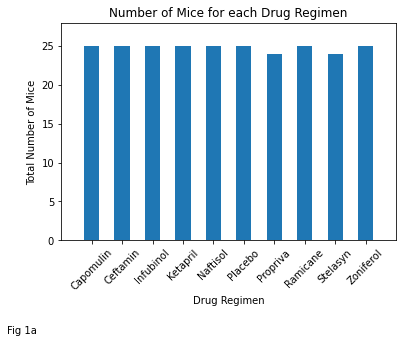

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
totalmice = remove_duplicate.groupby("Drug Regimen")["Mouse ID"].nunique()
totalmice.plot(kind ='bar')
plt.xticks(rotation=45)
plt.title('Number of Mice for each Drug Regimen')
plt.ylabel('Total Number of Mice')
plt.ylim(0, 28)
plt.xlim(-1, 10)
plt.figtext(0,-0.2, "Fig 1a")
plt.show()

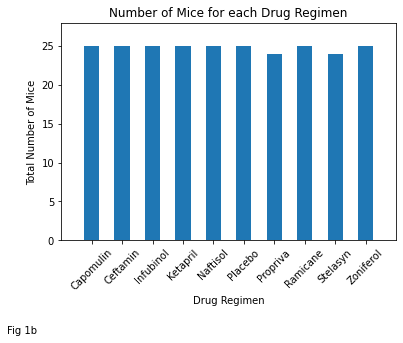

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

plt.bar(range(len(totalmice)), totalmice, tick_label = totalmice.index, width = 0.5)
plt.xticks(rotation=45)
plt.title('Number of Mice for each Drug Regimen')
plt.title('Number of Mice for each Drug Regimen')
plt.ylabel('Total Number of Mice')
plt.xlabel('Drug Regimen')
plt.ylim(0, 28)
plt.xlim(-1, 10)
plt.figtext(0,-0.2, "Fig 1b")
plt.show()

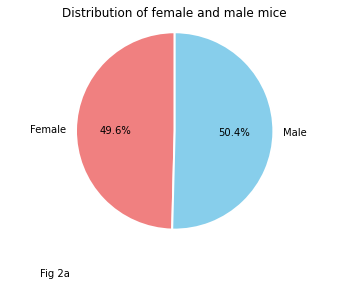

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sexmice = remove_duplicate.groupby("Sex")["Mouse ID"].nunique()
sexmice.plot.pie(autopct='%.1f%%', colors = ["lightcoral", "skyblue"],startangle = 90,wedgeprops = {'linewidth': 2, 'edgecolor': "w"})
plt.title('Distribution of female and male mice')
plt.ylabel('')
plt.axis('equal')
plt.figtext(0.2,0, "Fig 2a")
plt.show()

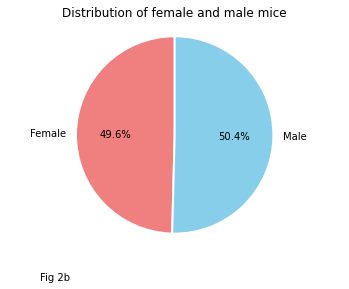

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = sexmice.index
sizes = sexmice.values
colours = ["lightcoral", "skyblue"]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, colors = colours, autopct='%.1f%%',startangle = 90,wedgeprops = {'linewidth': 2, 'edgecolor': "w"})
plt.title('Distribution of female and male mice', pad = 10)
ax1.axis('equal')
plt.figtext(0.2,0, "Fig 2b")
plt.show()

## Quartiles, Outliers and Boxplots

In [57]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxtime = remove_duplicate.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mergedtime = pd.merge(maxtime, remove_duplicate, on = ["Mouse ID", "Timepoint"])
mergedtime.head().style.set_caption('Tumor Volumes at Last Data Point').hide_index()

Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
a203,45,Infubinol,Female,20,23,67.973419,2
a251,45,Infubinol,Female,21,25,65.525743,1
a262,45,Placebo,Female,17,29,70.717621,4
a275,45,Ceftamin,Female,20,28,62.999356,3
a366,30,Stelasyn,Female,16,29,63.440686,1


In [58]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = remove_duplicate['Drug Regimen'].unique().tolist()
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
ranges = {}
outliers = {}
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

  
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    subset = mergedtime[mergedtime['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol.append(subset)
    
    # Determine outliers using upper and lower bounds
    quartiles = subset.quantile([0.25,0.5,0.75])
    lower = quartiles[0.25]
    upper = quartiles[0.75]
    iqr = upper - lower
    lowerbound = lower - (1.5 * iqr)
    upperbound = upper + (1.5 * iqr)
    ranges[drug] = [lowerbound,upperbound]
    
    outlier = []
    for x in subset:
        if (x > upperbound) | (x < lowerbound):
            outlier.append(x)
            
            
    outliers[drug] = subset[subset.isin(outlier)]

    
for key,value in outliers.items():
    print(f"Potential outliers in the {key} regimen are: {value}")


Potential outliers in the Ramicane regimen are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers in the Capomulin regimen are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers in the Infubinol regimen are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers in the Placebo regimen are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers in the Ceftamin regimen are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers in the Stelasyn regimen are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers in the Zoniferol regimen are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers in the Ketapril regimen are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers in the Propriva regimen are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers in the Naftisol regimen are: Series([], Name: Tumor Volume (mm3), 

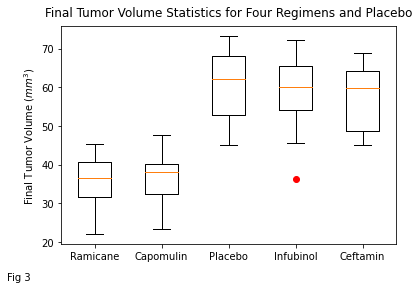

In [59]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
finaltumor_series = pd.Series(tumor_vol, index = treatments)
fig1, ax1 = plt.subplots()
ax1.boxplot(finaltumor_series[["Ramicane", "Capomulin","Placebo","Infubinol","Ceftamin"]],0,"r")
ax1.set_xticklabels(finaltumor_series[["Ramicane", "Capomulin","Placebo","Infubinol", "Ceftamin"]].index)
plt.title("Final Tumor Volume Statistics for Four Regimens and Placebo", pad=10)
plt.ylabel("Final Tumor Volume ($mm^{3}$)")
plt.figtext(0,0, "Fig 3")
plt.show()

## Line and Scatter Plots

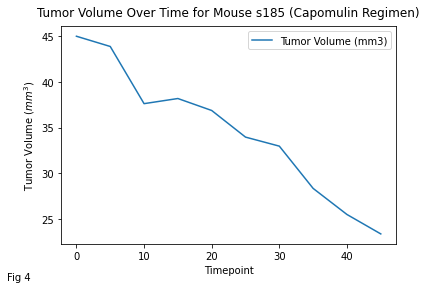

In [60]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin = remove_duplicate[remove_duplicate["Drug Regimen"]=="Capomulin"][["Mouse ID", "Timepoint","Tumor Volume (mm3)", 'Weight (g)']]
Capomulin[Capomulin["Mouse ID"] == "s185"].plot(kind = 'line', x = 'Timepoint', y = 'Tumor Volume (mm3)')
plt.title("Tumor Volume Over Time for Mouse s185 (Capomulin Regimen)", pad = 10)
plt.ylabel("Tumor Volume ($mm^{3}$)")
plt.figtext(0,0, "Fig 4")
plt.show()


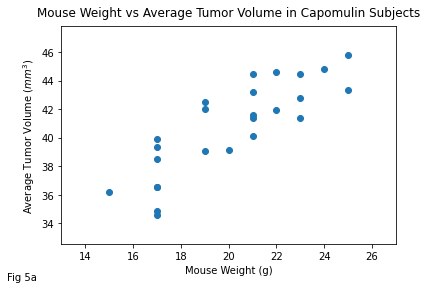

In [61]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#CapTumorMean = Capomulin.groupby('Mouse ID')['Tumor Volume (mm3)','Weight (g)'].mean()
x = Capomulin.groupby('Mouse ID')['Weight (g)'].mean()
y = Capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

#CapTumorMean.plot(kind = 'scatter', x = 'Weight (g)', y = 'Tumor Volume (mm3)')
CapomulinChart = plt.scatter(x,y)
plt.title('Mouse Weight vs Average Tumor Volume in Capomulin Subjects', pad = 10)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume ($mm^{3}$)')
plt.ylim(y.min()-2, y.max()+2)
plt.xlim(x.min()-2, x.max()+2)
plt.figtext(0,0, "Fig 5a")
plt.show()

## Correlation and Regression

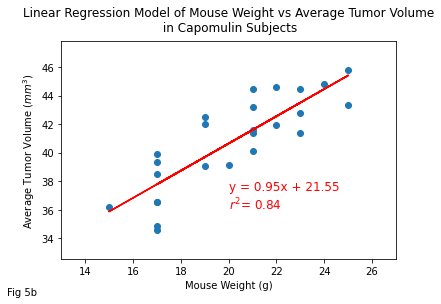

In [62]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regression = x*slope + intercept
line = f"y = {slope:.2f}x + {intercept:.2f}\n$r^{2}$= {rvalue:.2f}" 
plt.scatter(x,y)
plt.plot(x, regression, "r-")
plt.annotate(line, (20,36), fontsize = 12, color = "red")
plt.title('Linear Regression Model of Mouse Weight vs Average Tumor Volume\n in Capomulin Subjects', pad = 10)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume ($mm^{3}$)')
plt.ylim(y.min()-2, y.max()+2)
plt.xlim(x.min()-2, x.max()+2)
plt.figtext(0,0, "Fig 5b")
plt.show()


## Additional Graphs and Tables

In [63]:
#calculates mouse weight statistics
mouseweightstats = remove_duplicate.groupby("Drug Regimen").agg({"Weight (g)":["mean","median","var","std","sem"]})
mouseweightstats = mouseweightstats.xs('Weight (g)', axis = 1, drop_level = True)
meanmean = mouseweightstats['mean'].mean()
meanstd = mouseweightstats['mean'].std()
e = meanmean - meanstd
def highlight(i):
    color = 'yellow' if i < e else ''
    return 'background-color: %s' % color
mouseweightstats.style.format('{:.2f}').set_caption('Mouse Weight Statistics').applymap(highlight, subset=['mean'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,19.97,20.50,7.47,2.73,0.18
Ceftamin,27.40,28.00,2.50,1.58,0.12
Infubinol,27.20,27.00,4.77,2.18,0.16
Ketapril,27.86,28.00,3.39,1.84,0.13
Naftisol,27.17,27.00,2.25,1.50,0.11
Placebo,27.93,28.00,3.38,1.84,0.14
Propriva,27.14,26.00,2.93,1.71,0.14
Ramicane,19.68,19.00,10.47,3.24,0.21
Stelasyn,27.86,28.00,2.70,1.64,0.12


<ipython-input-64-9c0d39d50a7f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = remove_duplicate.groupby(['Drug Regimen','Mouse ID'])['Weight (g)', 'Tumor Volume (mm3)'].mean()


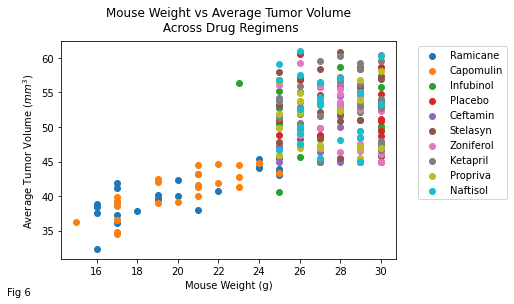

In [64]:
#plots mouse weight vs average tumor volume for all regimens
df = remove_duplicate.groupby(['Drug Regimen','Mouse ID'])['Weight (g)', 'Tumor Volume (mm3)'].mean()
df = df.droplevel(1)
for drug in treatments:
    x = df.loc[drug]["Weight (g)"]
    y = df.loc[drug]["Tumor Volume (mm3)"]
    plt.scatter(x,y, label=drug)
plt.legend(bbox_to_anchor = (1.05, 1.0))
plt.title('Mouse Weight vs Average Tumor Volume\n Across Drug Regimens', pad = 10)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume ($mm^{3}$)')
plt.figtext(0,0, "Fig 6")
plt.show()    



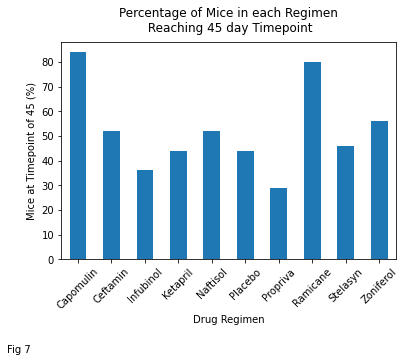

In [65]:
#calculates percentage of mice for each regimen making it to the 45 day timepoint 
time = mergedtime[mergedtime['Timepoint'] == 45]
reachedend = time['Drug Regimen'].value_counts()
percentage = round(reachedend/totalmice*100)
percentage.plot(kind = 'bar')
plt.title('Percentage of Mice in each Regimen\n Reaching 45 day Timepoint', pad = 10)
plt.xlabel('Drug Regimen')
plt.ylabel('Mice at Timepoint of 45 (%)')
plt.xticks(rotation=45)
plt.figtext(0,-0.2, "Fig 7")
plt.show()


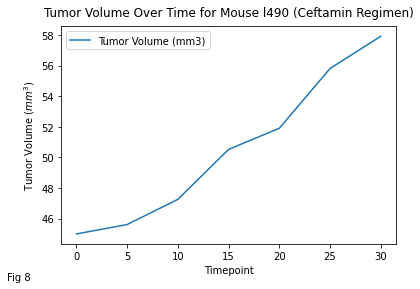

In [66]:
#Ceftamin plot to compare
Ceftamin = remove_duplicate[remove_duplicate["Drug Regimen"]=="Ceftamin"][["Mouse ID", "Timepoint","Tumor Volume (mm3)", 'Weight (g)']]
Ceftamin[Ceftamin["Mouse ID"] == "l490"].plot(kind = 'line', x = 'Timepoint', y = 'Tumor Volume (mm3)')
plt.title("Tumor Volume Over Time for Mouse l490 (Ceftamin Regimen)", pad = 10)
plt.ylabel("Tumor Volume ($mm^{3}$)")
plt.figtext(0,0, "Fig 8")
plt.show()

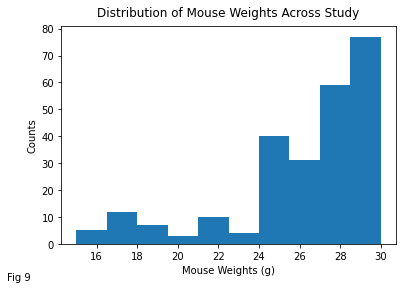

In [67]:
#show distribution of mouse weights across study
plt.hist(remove_duplicate.groupby('Mouse ID')['Weight (g)'].max())
plt.xlabel('Mouse Weights (g)')
plt.ylabel('Counts')
plt.title('Distribution of Mouse Weights Across Study', pad=10)
plt.figtext(0,0, "Fig 9")
plt.show()

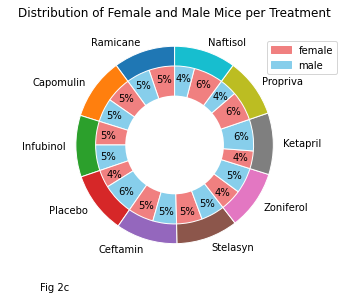

In [68]:
# Pie plot showing distribution of female versus male mice across each regimen
sexperregimen = remove_duplicate.groupby(["Drug Regimen","Sex"])["Mouse ID"].nunique()

plt.pie(totalmice, startangle = 90, pctdistance = 0.88, radius = 1, wedgeprops = {'linewidth': 1, 'edgecolor': "w"}, labels=treatments)
sexcolours = ["lightcoral", "skyblue"]
plt.pie(sexperregimen, startangle = 90, pctdistance = 0.85, radius = 0.8, colors = sexcolours,wedgeprops = {'linewidth': 1, 'edgecolor': "w"}, autopct='%.f%%')
centre = plt.Circle((0,0), 0.5, fc = 'w')
fig = plt.gcf()
fig.gca().add_artist(centre)
plt.title('Distribution of Female and Male Mice per Treatment', pad=20)
fpatch = mpatches.Patch(color=sexcolours[0], label = 'female')
mpatch = mpatches.Patch(color=sexcolours[1], label = 'male')
plt.legend(handles=[fpatch,mpatch], loc = 1)
plt.axis('equal')
plt.figtext(0.2,0, "Fig 2c")
plt.show()